# Sentiment Analysis (random text)
### MD. Mehedi Hassan Galib
### 04 August, 2020

<br/>
<br/>
<br/>

## Getting Libraries

In [1]:
import nltk
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

<br/>
<br/>

## Loading text data

In [2]:
df = open('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/text.txt', encoding = 'utf-8').read()

<br/>
<br/>

## Converting to lower case

In [3]:
lower = df.lower()

<br/>
<br/>

## Removing punctuetions

In [4]:
cleaned = lower.translate(str.maketrans('', '', string.punctuation))

<br/>
<br/>

## Tokenization

In [5]:
tokenized_words = word_tokenize(lower, 'english')

<br/>
<br/>

## Eliminate the words from our text which are stop words

In [6]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

<br/>
<br/>

## Creating a list of words which are both in our text and emotion list

In [7]:
emotion_list = []
with open('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/emotion.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word, emotion = clear_line.split(':')
        
        if word in final_words:
            emotion_list.append(emotion)
            
print(emotion_list)

[' attracted', ' sad', ' ecstatic']


<br/>
<br/>

## Count the words

In [8]:
count = Counter(emotion_list)
count

Counter({' attracted': 1, ' sad': 1, ' ecstatic': 1})

<br/>
<br/>

## Measure the positiveness and negativeness of the text

In [9]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    
sentiment_analyse(cleaned)  

{'neg': 0.023, 'neu': 0.863, 'pos': 0.114, 'compound': 0.9907}


<br/>
<br/>

## Plot a graph of our analysis

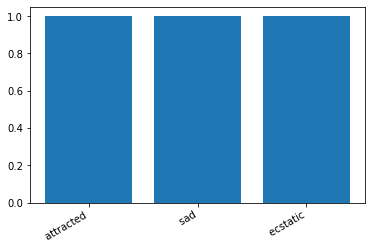

In [10]:
fig, ax1 = plt.subplots()
ax1.bar(count.keys(), count.values())
fig.autofmt_xdate()
plt.show()

<br/>
<br/>

## According to measure

In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)   
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
        
sentiment_analyse(cleaned)

Positive Sentiment
